In [186]:
import torch
from torch import nn, optim
import random
from IPython import display
import numpy as np
from matplotlib import pyplot as plt

def plot_data(X, y, d=0, auto=False, zoom=1):
    X = X.cpu()
    y = y.cpu()
    plt.scatter(X.numpy()[:, 0], X.numpy()[:, 1], c=y, s=20, cmap=plt.cm.Spectral)
    plt.axis('square')
    plt.axis(np.array((-1.1, 1.1, -1.1, 1.1)) * zoom)
    if auto is True: plt.axis('equal')

    _m, _c = 0, '.15'
    plt.axvline(0, ymin=_m, color=_c, lw=1, zorder=0)
    plt.axhline(0, xmin=_m, color=_c, lw=1, zorder=0)


def plot_model(X, y, model):
    model.cpu()
    mesh = np.arange(-1.1, 1.1, 0.01)
    xx, yy = np.meshgrid(mesh, mesh)
    with torch.no_grad():
        data = torch.from_numpy(np.vstack((xx.reshape(-1), yy.reshape(-1))).T).float()
        Z = model(data).detach()
    Z = np.argmax(Z, axis=1).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plot_data(X, y)


def set_default(figsize=(10, 10), dpi=100):
    plt.style.use(['dark_background', 'bmh'])
    plt.rc('axes', facecolor='k')
    plt.rc('figure', facecolor='k')
    plt.rc('figure', figsize=figsize, dpi=dpi)


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('device: ', device)

seed = 12345
random.seed(seed)
torch.manual_seed(seed)


device:  cuda:0


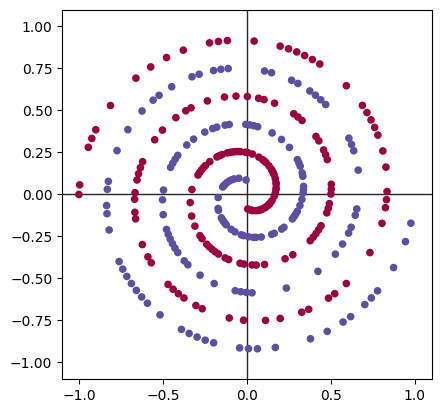

In [187]:
def load_raw_data(path):
    with open(path, 'r') as file:
        data = np.array([tuple(map(float, line.strip().split())) for line in file])
    return data

train_data = load_raw_data("C:\\Users\\hp\\Downloads\\two_spiral_train_data.txt")
train_data = train_data.astype(np.float32)
test_data = load_raw_data("C:\\Users\\hp\\Downloads\\two_spiral_test_data.txt")
test_data = test_data.astype(np.float32)

X = torch.from_numpy(train_data[:,0:2]).to(device)
X /= 6
Y = torch.LongTensor(train_data[:,-1]).to(device)

plot_data(X, Y)

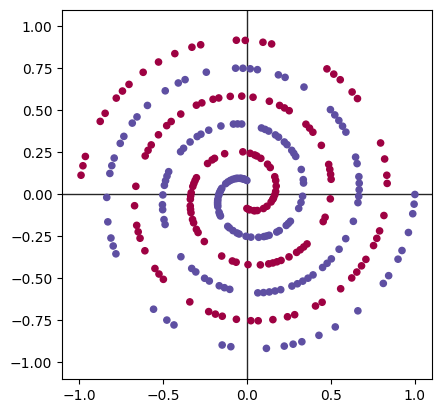

In [188]:
X_t = torch.from_numpy(test_data[:,0:2]).to(device)
X_t /= 6
Y_t = torch.LongTensor(test_data[:,-1]).to(device)

plot_data(X_t, Y_t)

tensor(1., device='cuda:0')


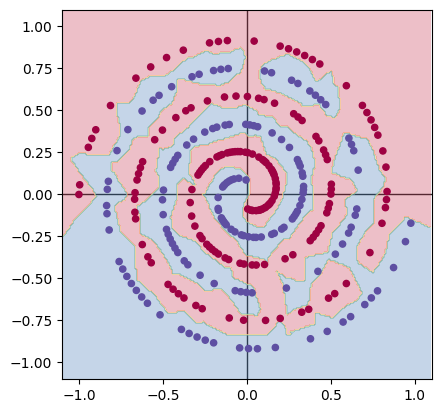

In [189]:
dim = 2 #样本的特征维度
classes = 2 #样本类别
hidden = 128 #神经网络隐藏层单元神经元个数

learning_rate = 1e-3
lambda_l2 = 1e-5
model = nn.Sequential(
    nn.Linear(dim, hidden),
    nn.LeakyReLU(),
    nn.Linear(hidden, classes)
)
model.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(
    model.parameters(),
    lr = learning_rate,
    weight_decay = lambda_l2
)

loss_list = []
acc_list = []
epoch = 50000
for e in range(epoch):
    Y_pred = model(X)
    loss = criterion(Y_pred, Y)
    score, predicted = torch.max(Y_pred, 1)
    acc = (Y == predicted).sum().float() / len(Y)
    loss_list.append(loss)
    acc_list.append(acc)
    display.clear_output(wait = True)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(acc)
plot_model(X, Y, model)

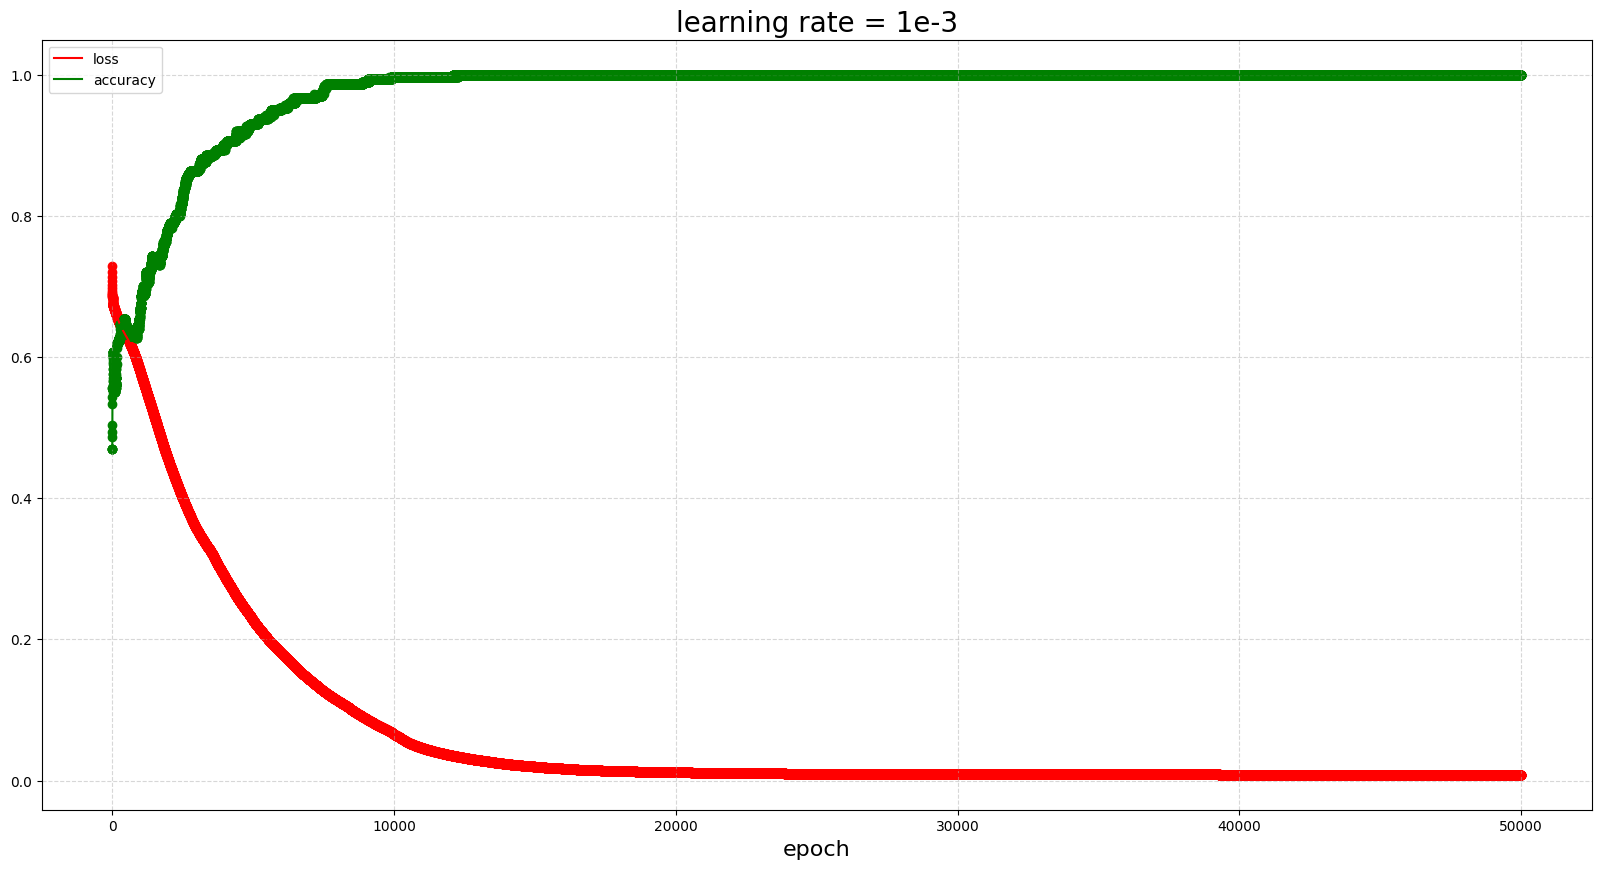

In [190]:
x1 = [i+1 for i in range(epoch)]
loss_list = torch.tensor(loss_list)
loss_list = loss_list.cpu().numpy()
acc_list = torch.tensor(acc_list)
acc_list = acc_list.cpu().numpy()

plt.figure(figsize=(20, 10), dpi=100)
plt.plot(x1, loss_list, c='red', label='loss')
plt.plot(x1, acc_list, c='green', label='accuracy')
plt.scatter(x1, loss_list, c='red')
plt.scatter(x1, acc_list, c='green')
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel("epoch", fontdict={'size': 16})
plt.title("learning rate = 1e-3", fontdict={'size': 20})
plt.show()



tensor(0.9267, device='cuda:0')


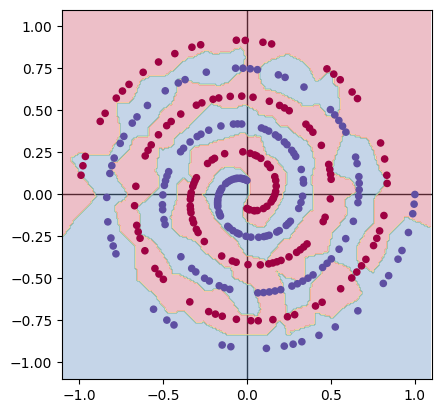

In [191]:
model.to(device)
Y_t_pred = model(X_t)
score_t, predicted_t = torch.max(Y_t_pred, 1)
display.clear_output(wait = True)
acc_t = (Y_t == predicted_t).sum().float() / len(Y_t)
print(acc_t)
plot_model(X_t, Y_t, model)